In [1]:
#conda install -c conda-forge plotnine

In [2]:
#pip install kmodes

In [3]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [36]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [283]:
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [284]:
df = pd.read_csv('sku_clustering.csv')
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df

Dimension data: 9159 rows and 23 columns


,sku_ID,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('order_hour', 'group_mode')","('day_of_month', 'nunique')","('day_of_month', 'group_mode')","('original_unit_price', 'mean')","('discount_rate', 'mean')",...,"('gift_item', 'mean')","('dc_ori', 'nunique')","('dc_ori', 'group_mode')","('dc_des', 'nunique')","('dc_des', 'group_mode')","('promise', 'group_mode')","('type', 'group_mode')",brand_ID,attribute1,attribute2
0,000aa92b82,1.167,14,12,7,"(20.0, 22.0]",10,11,83.333,0.013,...,0.000,6,2,9,4,-,2,9d3465eacc,4.0,100.0
1,000d4af39d,1.000,1,1,1,"(8.0, 10.0]",1,12,159.000,0.509,...,0.000,1,9,1,9,-,2,42e6445fca,4.0,100.0
2,000dc27e13,1.000,1,1,1,"(13.0, 15.0]",1,12,116.000,0.207,...,0.000,1,5,1,5,-,2,4f65703579,3.0,100.0
3,000e84e3a7,1.000,1,1,1,"(0.0, 8.0]",1,19,75.000,0.000,...,0.000,1,9,1,9,-,2,137b63c785,3.0,100.0
4,00104dbcd7,1.072,89,83,10,"(18.0, 20.0]",26,14,79.000,0.260,...,0.000,7,5,36,4,2,2,5a0b271e15,2.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,fff33f1633,1.500,3,2,2,"(10.0, 11.0]",2,11,109.000,0.092,...,0.000,1,5,2,16,-,2,603dc9ab6b,3.0,100.0
9155,fff4328ec0,1.000,1,1,1,"(16.0, 18.0]",1,10,109.000,0.000,...,0.000,1,10,1,10,-,2,bd97f9a5fa,4.0,100.0
9156,fff84ed7ec,1.231,16,13,7,"(13.0, 15.0]",4,30,69.000,0.003,...,0.000,6,5,8,5,1,1,ab56426464,1.0,-
9157,fffe1bd280,1.207,588,486,10,"(20.0, 22.0]",29,8,68.051,0.391,...,0.000,25,2,40,2,1,1,adbd559b78,3.0,70.0


In [285]:
df.columns

Index(['sku_ID', '('quantity', 'mean')', '('quantity', 'sum')',
       '('order_ID', 'nunique')', '('order_hour', 'nunique')',
       '('order_hour', 'group_mode')', '('day_of_month', 'nunique')',
       '('day_of_month', 'group_mode')', '('original_unit_price', 'mean')',
       '('discount_rate', 'mean')', '('direct_discount_rate', 'mean')',
       '('quantity_discount_rate', 'mean')',
       '('bundle_discount_rate', 'mean')', '('gift_item', 'mean')',
       '('dc_ori', 'nunique')', '('dc_ori', 'group_mode')',
       '('dc_des', 'nunique')', '('dc_des', 'group_mode')',
       '('promise', 'group_mode')', '('type', 'group_mode')', 'brand_ID',
       'attribute1', 'attribute2'],
      dtype='object')

In [286]:
df["attribute1"] = df["attribute1"].replace('-', None).astype('float')
df["attribute2"] = df["attribute2"].replace('-', None).astype('float')
df["('type', 'group_mode')" ] = df["('type', 'group_mode')" ].astype('object')
df["('dc_ori', 'group_mode')"] = df["('dc_ori', 'group_mode')"].astype('object')
df["('dc_des', 'group_mode')"] = df["('dc_des', 'group_mode')"].astype('object')
df['brand_ID'] = df['brand_ID'].astype('str')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sku_ID                              9159 non-null   object 
 1   ('quantity', 'mean')                9159 non-null   float64
 2   ('quantity', 'sum')                 9159 non-null   int64  
 3   ('order_ID', 'nunique')             9159 non-null   int64  
 4   ('order_hour', 'nunique')           9159 non-null   int64  
 5   ('order_hour', 'group_mode')        9159 non-null   object 
 6   ('day_of_month', 'nunique')         9159 non-null   int64  
 7   ('day_of_month', 'group_mode')      9159 non-null   int64  
 8   ('original_unit_price', 'mean')     9159 non-null   float64
 9   ('discount_rate', 'mean')           9159 non-null   float64
 10  ('direct_discount_rate', 'mean')    8814 non-null   float64
 11  ('quantity_discount_rate', 'mean')  8809 no

In [288]:
df.select_dtypes('object').nunique()

sku_ID                          9159
('order_hour', 'group_mode')      10
('dc_ori', 'group_mode')          18
('dc_des', 'group_mode')          60
('promise', 'group_mode')          9
('type', 'group_mode')             2
brand_ID                        1064
dtype: int64

In [289]:
# Summary statistics of numerical variable
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts(),'\n')

62a90347de    1
46118cf552    1
121101ebd1    1
ee2efc6d96    1
ac86c6b269    1
             ..
fd65d75ba5    1
29084633a1    1
140bfd67e3    1
57f48cfb44    1
17c0d329cb    1
Name: sku_ID, Length: 9159, dtype: int64 

(8.0, 10.0]     1617
(11.0, 13.0]    1413
(13.0, 15.0]    1343
(0.0, 8.0]      1226
(20.0, 22.0]    1177
(18.0, 20.0]     674
(16.0, 18.0]     648
(10.0, 11.0]     556
(15.0, 16.0]     336
(22.0, 23.0]     169
Name: ('order_hour', 'group_mode'), dtype: int64 

5     2795
9     1885
2     1525
4     1228
7      836
24     537
10     294
28      22
58      12
56       6
59       5
3        4
57       3
65       2
26       2
12       1
32       1
19       1
Name: ('dc_ori', 'group_mode'), dtype: int64 

9     1285
5     1239
4      916
2      864
24     417
27     315
20     237
26     213
7      191
17     182
31     174
16     174
28     169
44     157
39     155
42     151
45     132
33     132
6      128
10     122
36     118
41     106
37      99
32      99
46      88


In [290]:
df.describe()

,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('day_of_month', 'nunique')","('day_of_month', 'group_mode')","('original_unit_price', 'mean')","('discount_rate', 'mean')","('direct_discount_rate', 'mean')","('quantity_discount_rate', 'mean')","('bundle_discount_rate', 'mean')","('gift_item', 'mean')","('dc_ori', 'nunique')","('dc_des', 'nunique')",attribute1,attribute2
count,9159.000,9159.000,9159.000,9159.000,9159.000,9159.000,9159.000,9159.000,8814.000,8809.000,8814.000,9159.000,9159.000,9159.000,8697.000,8646.000
mean,1.139,73.060,59.078,3.938,6.426,14.820,142.755,0.189,0.104,inf,0.001,0.049,3.640,8.650,3.001,81.416
std,1.638,565.733,452.052,3.263,7.995,9.517,316.116,0.263,0.176,nan,0.014,0.211,4.470,13.072,0.788,21.289
min,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,30.000
25%,1.000,1.000,1.000,1.000,1.000,7.000,68.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,60.000
50%,1.000,3.000,3.000,3.000,3.000,13.000,100.000,0.048,0.000,0.000,0.000,0.000,2.000,3.000,3.000,100.000
75%,1.056,13.000,12.000,6.000,8.000,24.000,169.000,0.309,0.159,0.005,0.000,0.000,5.000,9.000,4.000,100.000
max,101.000,25769.000,23625.000,10.000,31.000,31.000,12158.000,1.000,0.915,inf,0.912,1.000,50.000,60.000,4.000,100.000


In [291]:
# Check missing value
df.isna().sum()

sku_ID                                  0
('quantity', 'mean')                    0
('quantity', 'sum')                     0
('order_ID', 'nunique')                 0
('order_hour', 'nunique')               0
('order_hour', 'group_mode')            0
('day_of_month', 'nunique')             0
('day_of_month', 'group_mode')          0
('original_unit_price', 'mean')         0
('discount_rate', 'mean')               0
('direct_discount_rate', 'mean')      345
('quantity_discount_rate', 'mean')    350
('bundle_discount_rate', 'mean')      345
('gift_item', 'mean')                   0
('dc_ori', 'nunique')                   0
('dc_ori', 'group_mode')                0
('dc_des', 'nunique')                   0
('dc_des', 'group_mode')                0
('promise', 'group_mode')               0
('type', 'group_mode')                  0
brand_ID                                0
attribute1                            462
attribute2                            513
dtype: int64

In [293]:
#Replace NaN and Inf with 0 value, since all of them are under gift items's other discount, 
df.fillna(value=0, inplace=True)
df.replace(np.Inf, 0, inplace=True)

In [294]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['sku_ID', "('order_hour', 'group_mode')", "('promise', 'group_mode')", 'brand_ID']
Categorical columns position  : [0, 5, 18, 20]


In [295]:
# Convert dataframe to matrix
# drop(["('order_hour', 'group_mode')","('promise', 'group_mode')"], axis = 1)
# list(df.select_dtypes('object').columns)
dfMatrix = df.to_numpy()
dfMatrix

array([['000aa92b82', 1.1666666666666667, 14, ..., '9d3465eacc', 4.0,
        100.0],
       ['000d4af39d', 1.0, 1, ..., '42e6445fca', 4.0, 100.0],
       ['000dc27e13', 1.0, 1, ..., '4f65703579', 3.0, 100.0],
       ...,
       ['fff84ed7ec', 1.2307692307692308, 16, ..., 'ab56426464', 1.0,
        100.0],
       ['fffe1bd280', 1.2073921971252566, 588, ..., 'adbd559b78', 3.0,
        70.0],
       ['fffe6eb4df', 1.0, 8, ..., '042c8894a9', 3.0, 100.0]],
      dtype=object)

In [296]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'random', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as inst:
        print(inst)
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


In [297]:
cost

[5733331875.185726,
 2891835441.8640027,
 1877299767.9610946,
 1144975749.0168502,
 793905578.5218629,
 636274626.419177]

In [298]:
np.array(range(1, 6))

array([1, 2, 3, 4, 5])

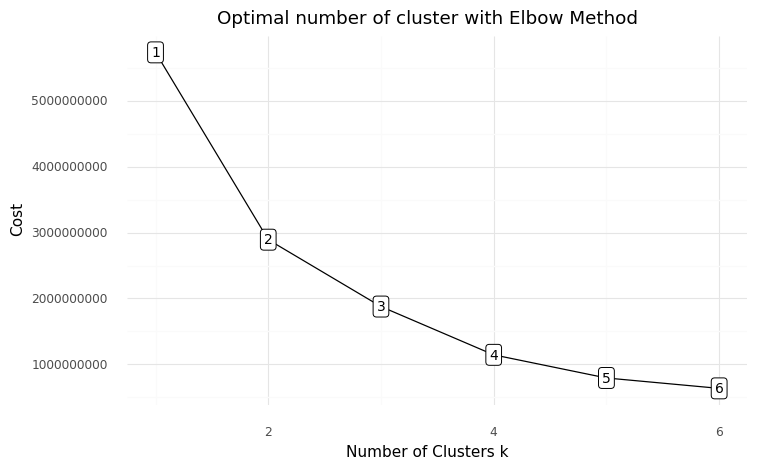

<ggplot: (8776634914917)>

In [258]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 7), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [299]:
# Fit the cluster
kprototype4 = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'random', random_state = 0)
kprototype4.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [300]:
# Cluster centroid
kprototype4.cluster_centroids_

array([['1.0', '1.0', '1.0', '1.0', '1.0', '14.090909090909092',
        '8297.363636363636', '2.2078298785159363e-18', '0.0', '0.0',
        '0.0', '0.0', '1.0', '9.0', '1.0', '31.09090909090909', '2.0',
        '2.909090909090909', '58.18181818181818', '1904d943c0',
        '(13.0, 15.0]', '-', '14294f608f'],
       ['1.1383092447758463', '36.22123015873016', '30.39539241622575',
        '3.890983245149912', '6.25242504409171', '14.839065255731922',
        '133.24781999106128', '0.1877605908117027',
        '0.09937337034248422', '0.026389737823975728',
        '0.0004829449059675283', '0.04792030546744961',
        '3.424272486772487', '6.847773368606702', '8.23423721340388',
        '18.777336860670193', '1.9695767195767195', '2.8500881834215166',
        '76.84413580246914', '000aa92b82', '(8.0, 10.0]', '-', 'nan'],
       ['1.2511188707572423', '15219.142857142857', '12125.42857142857',
        '10.0', '27.714285714285715', '11.857142857142858',
        '108.4866349855216', '0.3

In [277]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 6, init = 'random', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 1, 2, 1], dtype=uint16)

In [278]:
# Cluster centroid
kprototype.cluster_centroids_

array([['1.347083160201851', '6854.466666666666', '5185.866666666667',
        '10.0', '29.4', '8.0', '105.73794414827438',
        '0.40812640881865675', '0.11361798029454015',
        '0.14729101897573574', '0.06547347819907992',
        '0.12717553119501965', '41.13333333333333', '10.266666666666667',
        '59.93333333333333', '4.8', '1.0666666666666667',
        '2.933333333333333', '86.0', '38d636d2a6', '(20.0, 22.0]', '1',
        '5ab8ea8556'],
       ['1.1338902181935666', '17.402990146109413', '15.360289953562125',
        '3.725450220863065', '5.73462453278967', '14.828859440480235',
        '134.43560264967616', '0.17964899546723231',
        '0.09835025788890113', '0.02502108276661391',
        '0.000377707254526193', '0.04262269678514347',
        '3.1533582512175786', '6.850379431419187', '7.012798731453166',
        '19.09389511835995', '1.9781402197304339', '2.850266168308982',
        '76.84448974968852', '000aa92b82', '(8.0, 10.0]', '-', 'nan'],
       ['1.29886721

In [279]:
# Check the iteration of the clusters created
kprototype.n_iter_


13

In [280]:
# Check the cost of the clusters created
kprototype.cost_

636274626.419177

In [281]:
# Add the cluster to the dataframe
df['cluster_id'] = kprototype.labels_ 

In [282]:
print('Number of skus in cluster 0 = ', sum(df['cluster_id']==0))
print('Number of skus in cluster 1 = ', sum(df['cluster_id']==1))
print('Number of skus in cluster 2 = ', sum(df['cluster_id']==2))
print('Number of skus in cluster 3 = ', sum(df['cluster_id']==3))
print('Number of skus in cluster 4 = ', sum(df['cluster_id']==4))
print('Number of skus in cluster 5 = ', sum(df['cluster_id']==5))

Number of skus in cluster 0 =  15
Number of skus in cluster 1 =  8829
Number of skus in cluster 2 =  243
Number of skus in cluster 3 =  5
Number of skus in cluster 4 =  56
Number of skus in cluster 5 =  11


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sku_ID                              9159 non-null   object 
 1   ('quantity', 'mean')                9159 non-null   float64
 2   ('quantity', 'sum')                 9159 non-null   int64  
 3   ('order_ID', 'nunique')             9159 non-null   int64  
 4   ('order_hour', 'nunique')           9159 non-null   int64  
 5   ('order_hour', 'group_mode')        9159 non-null   object 
 6   ('day_of_month', 'nunique')         9159 non-null   int64  
 7   ('day_of_month', 'group_mode')      9159 non-null   int64  
 8   ('original_unit_price', 'mean')     9159 non-null   float64
 9   ('discount_rate', 'mean')           9159 non-null   float64
 10  ('direct_discount_rate', 'mean')    9159 non-null   float64
 11  ('quantity_discount_rate', 'mean')  9159 no